# Исследование данных о продаже компьютерных игр. 

### Откроем файл с данными и изучим общую информацию.

In [1]:
#откроем файл и изучим первые 10 строк датафрейма

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
#изучим общую информацию о датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


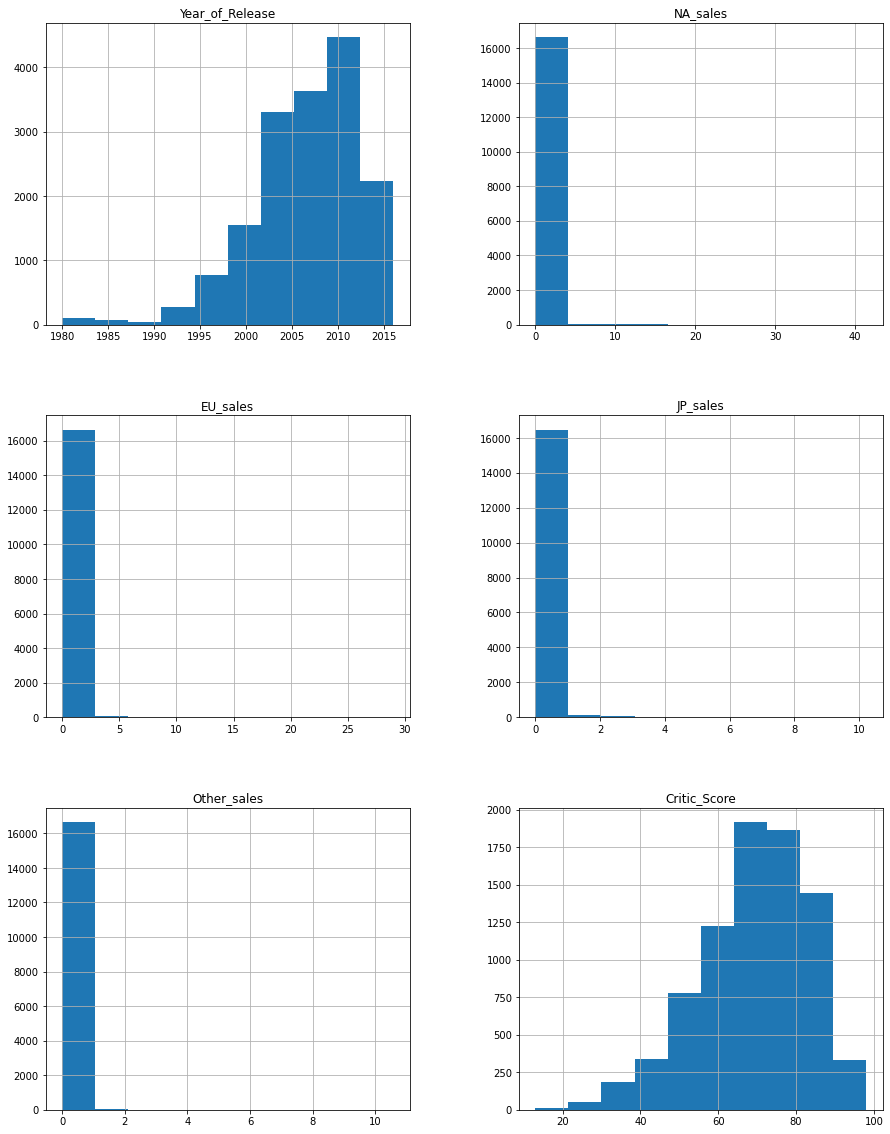

In [4]:
#посмотрим на гистограммы по каждому столбцу в формате float 

data.hist(figsize=(15, 20));

# Вывод по первому этапу исследования 

Изучив данные видим датафрейм с количеством строк - 16715 и состоящий из 11 столбцов. На первом этапе видим необходимость привести имена столбцов датафрейма к одному виду. Внушительное количество пропусков видим в столбцах отображающих оценку критиков и пользователей и в столбце с рейтингом компьютерных игр по возрастным категориям. В столбце с годом выпуска необходимо привести числовые данные к целому значению, для удобства дальнейшей работы с датафреймом. 

### Подготовка данных к исследованию.

In [5]:
#изменим названия столбцов, приведем к нижнему регистру

data = data.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 
                           'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 
                           'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 
                           'Rating': 'rating'})

In [6]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
#итзучим количество пропусков в датафрейме

data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
#посмотрим на пропущенные значения в процентах визуально

def pass_value_barh(data):
    (
        (data.isna().mean()*100)
        .to_frame()
        .rename(columns={0: 'space'})
        .query('space > 0')
        .sort_values(by='space', ascending=True)
        .plot(kind='barh', figsize=(19,6), legend=False, fontsize=16)
        .set_title('Количество пропущенных значений в процентах' + "\n", fontsize=22, color='SteelBlue')    
    );    

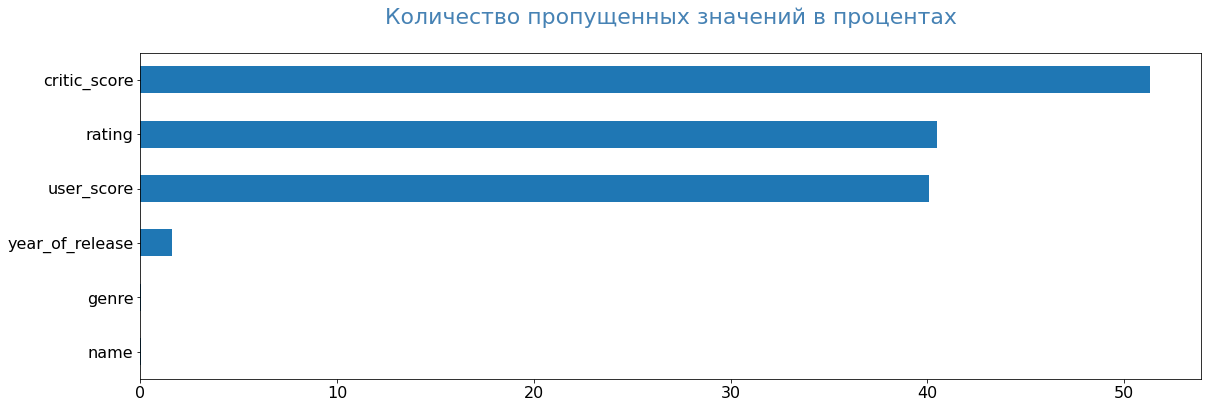

In [10]:
pass_value_barh(data)

In [11]:
#пропуски в столбцах year_of_release, name, genre составляют менее 2-х процентов 
#принимаем решение удалить строки с пропупсками в этих столбцах

data = data.dropna(subset=['year_of_release'])
data = data.dropna(subset=['name'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [13]:
#преобразуем тип данных с годом выпуска в int, для удобства работы с типом данных в виде целого числа

data['year_of_release'] = data['year_of_release'].astype('int')

In [14]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [15]:
#посмотрим на уникальные значения столбца с оценкой пользователей

data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

По информации из интернета аббревиатура tbd от английского To Be Determined (будет определено), т.е. данные будут внесены позже, когда появится значение, оценка пользователя. Смело предполагаем что это можно приравнять к NaN 

In [16]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Пропуски в столбце который сожердит оценки пользователя, могут отсутствовать по желанию пользователя не оценивать данную игру, либо годы выпуска некоторых игр не имели возможности собирать и фиксировать оценки пользователя, можем предположить что все пропуски это отрицательные значения рейтинга, со значением -1, чтобы при анализе использовать фильтрацию этого значения и учитывать значения с нулевым рейтингом. 

In [17]:
data['user_score'] = data['user_score'].fillna(-1)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score            0
rating             6676
dtype: int64

In [18]:
#изменит тип столбца user_score на float для удобства дальнейшей работы с данными

data['user_score'] = data['user_score'].astype('float')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [20]:
#взгялнем на уникальные значения столбца rating 

data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [21]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»). 

Информация с википедии

Заполнить пропуски чем то средним не можем, отсутствие рейтинга может говорить о раннем выходе игры, когда еще не было данной организации. 

Предлагаю придумать значение отсутсвия рейтинга , например ESRB_missing и заполнить этим пропуски

In [22]:
data['rating'] = data['rating'].fillna('ESRB_missing')
data['rating'].value_counts()

ESRB_missing    6676
E               3921
T               2905
M               1536
E10+            1393
EC                 8
K-A                3
RP                 1
AO                 1
Name: rating, dtype: int64

In [23]:
#заменим знаки рейтинга на развернутые описания знаков рейтинга ESRB взятых из википедии 

data['rating'] = data['rating'].replace('E', 'Для всех')
data['rating'] = data['rating'].replace('T', 'Подросткам')
data['rating'] = data['rating'].replace('M', 'Для взрослых')
data['rating'] = data['rating'].replace('AO', 'Только для взрослых')
data['rating'] = data['rating'].replace('E10+', 'Для всех от 10 лет и старше')
data['rating'] = data['rating'].replace('EC', 'Для детей младшего возраста')
data['rating'] = data['rating'].replace('K-A', 'Для всех')
data['rating'] = data['rating'].replace('RP', 'ESRB_missing')
data['rating'].value_counts()

ESRB_missing                   6677
Для всех                       3924
Подросткам                     2905
Для взрослых                   1536
Для всех от 10 лет и старше    1393
Для детей младшего возраста       8
Только для взрослых               1
Name: rating, dtype: int64

In [24]:
#посмотрим на уникальные значения столбца critic_score

data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Думаю, что возникшие пропуски в этом столбце имеют аналогичные причины как и со столбцом содержащим оценки пользователей. 

Принимаю решение также заполнить эти значения отрицательными. 

In [25]:
#принимаю решение заполнить пропуски в столбце оценка критиков отрицательным значением

data['critic_score'] = data['critic_score'].fillna(-1)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [27]:
#посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [28]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,Для всех,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,ESRB_missing,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,Для всех,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,Для всех,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,ESRB_missing,31.38


In [29]:
#проверим датасет на наличие дубликатов

data.duplicated().sum()

0

### Исследовательский анализ данных 

#### Посмотрим, сколько игр выпускалось в разные годы.

In [31]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

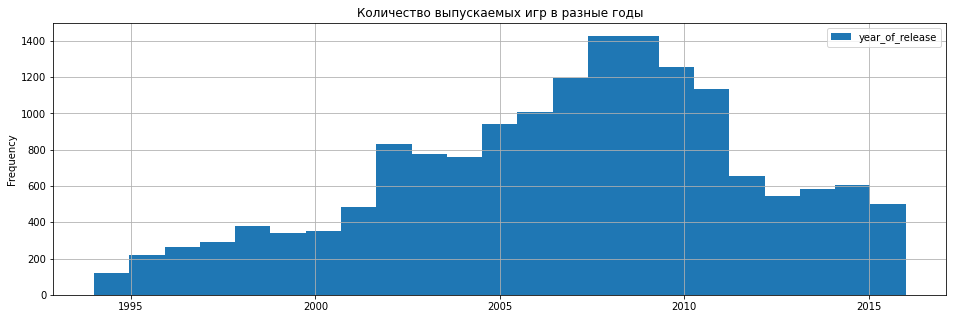

In [32]:
data['year_of_release'].plot(
    title='Количество выпускаемых игр в разные годы',
    kind='hist',
    grid=True,
    bins=23,
    legend=True,
    range=(1994, 2016),
    figsize=(16, 5)
);

Для представления на графике отбросили годы с выпуском игр меньше ста. Лидеры по выпуску игр на отрезке с 1993 по 2016 год, стали 2008, 2009 годы с количеством 1426, 1427 игр. Больше тысячи игр выпускали в период с 2006 по 2011 годы. 

#### Посмотрим, как менялись продажи по платформам. 

In [33]:
data.pivot_table(index=['platform'], values='sum_sales', aggfunc='sum') \
    .sort_values(by='sum_sales', ascending=False) \
    .head(10)

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Топ продаж игр по платформам занимает PS2, следом идут X360, Wii, PS3, DS, PS 

С платформы PS видим резкий скачок по сумме продаж, выберем платформы начиная с PS

In [34]:
#выберем топ 6 платформ по сумме продаж 

top_platforms = ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS']

In [35]:
top_six = data.loc[data['platform'].isin(top_platforms)]
top_six

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,Для всех,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,Для всех,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,Для всех,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,Для всех,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,Для всех,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,-1.0,-1.0,ESRB_missing,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,-1.0,-1.0,Для всех,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,-1.0,-1.0,ESRB_missing,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,ESRB_missing,0.01


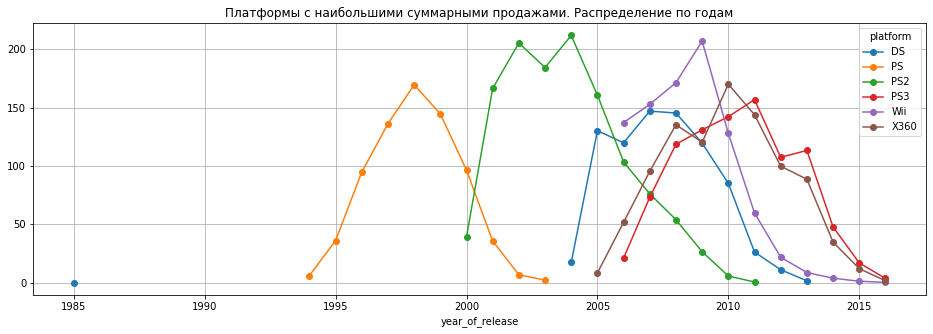

In [36]:
top_six.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum') \
    .plot(kind='line', style='o-', figsize=(16, 5), grid=True, \
          title='Платформы с наибольшими суммарными продажами. Распределение по годам');

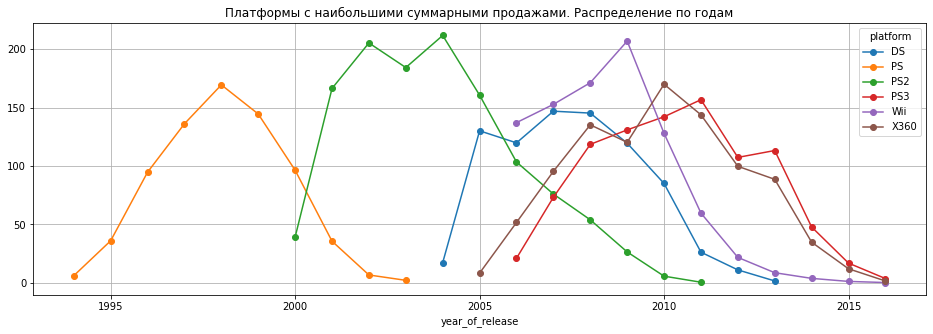

In [37]:
#воспроизведем график без артефакта платформы DS

top_six.query('year_of_release != 1985').pivot_table(
    index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum') \
    .plot(kind='line', style='o-', figsize=(16, 5), grid=True, \
          title='Платформы с наибольшими суммарными продажами. Распределение по годам');

C 1994 по 2006 появлялись платформы с суммарным топом продаж. С 2011 начинают исчезать все платформы, что были в топе.

* PS просуществал с 1994 по 2003. 9 лет 
* PS2 с 2000 по 2011. 11 лет 
* DS с 2004 по 2013. Снова 9 лет  
* X360 с 2005 по 2016. 11 лет 
* Wii с 2006 по 2016. 10 лет 
* PS3 с 2006 по 2016. Опять 10 лет сущестования 

Характерный срок "жизни" платформы 10 лет. 

#### Определим актуальный период для дальнейшего исследования 

Нам необходимо построить прогноз продаж игр на 2017 год.

Исходя из предыдущих исследований, определим актуальныый период с 2012 по 2016 год.

Начиная с 2012 года количество выпущенных игр показывает максимум за весь отрезок в данных.

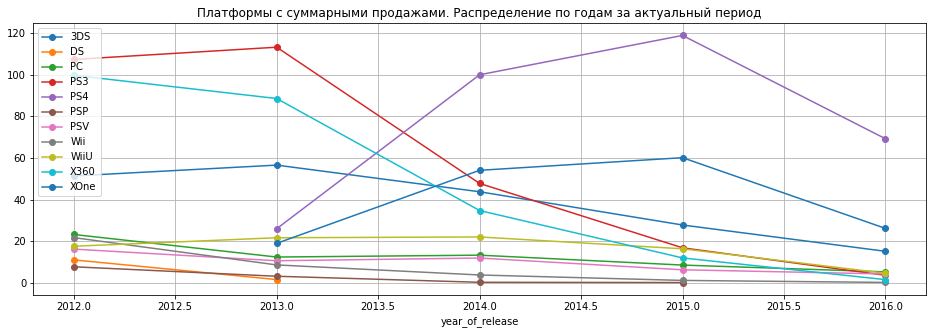

In [38]:
#на основании выбора актуального периода, посмотрим на потенциально прибыльные платформы

data.query('year_of_release >= 2012').pivot_table(
    index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum') \
    .plot(kind='line', style='o-', figsize=(16, 5), grid=True, \
          title='Платформы с суммарными продажами. Распределение по годам за актуальный период');
plt.legend(loc='upper left');

Ответим на вопроос: какие платформы лидируют по продажам, растут или падают?

Платформы PS4, PS3, XOne, 3DS на 2016 год лидируют по продажам. 

Также на графике видно что количество продаж снижается у всех платформ к 2016 году, делаем вывод что все игровые продажи падают.

In [39]:
data_actual = data.query('year_of_release >= 2012')
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,Для взрослых,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,Для взрослых,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,ESRB_missing,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,ESRB_missing,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,Для взрослых,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,ESRB_missing,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,ESRB_missing,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,ESRB_missing,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,ESRB_missing,0.01


In [40]:
data_actual.pivot_table(index=['platform'], values='sum_sales', aggfunc='sum') \
    .sort_values(by='sum_sales', ascending=False) \
    .head(10)

,sum_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

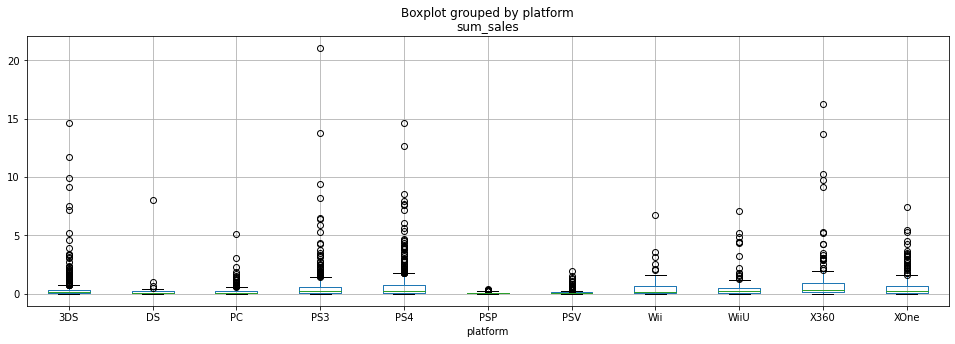

In [41]:
data_actual.boxplot(column='sum_sales', by='platform', figsize=(16, 5));

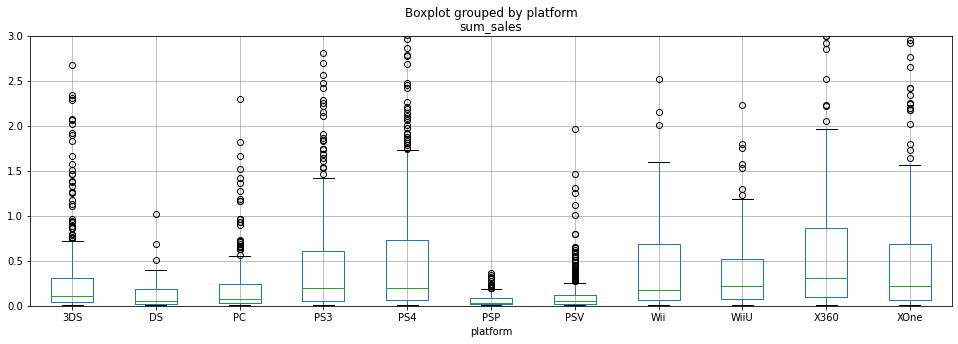

In [42]:
data_actual.boxplot(column='sum_sales', by='platform', figsize=(16, 5));
plt.ylim(0, 3);

Медианное значение платформ розниться от 0,05 до 0,25 млн прибыли. Верхние границы до начала аномалий у платформ PS4 и X360 доходят до 1,7 млн, у остальных платформ от 0,25 до 1,5 млн. Платформа PS2 имеет самый маленький бокс, без аномалий, соответственно ее сумма продаж минимальны на общем фоне. Самое высокое значение выброса у платформы PS3.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

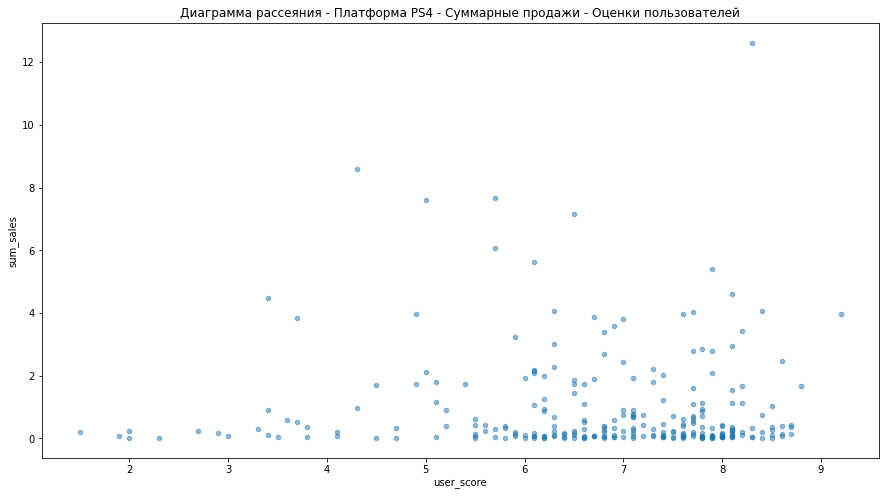

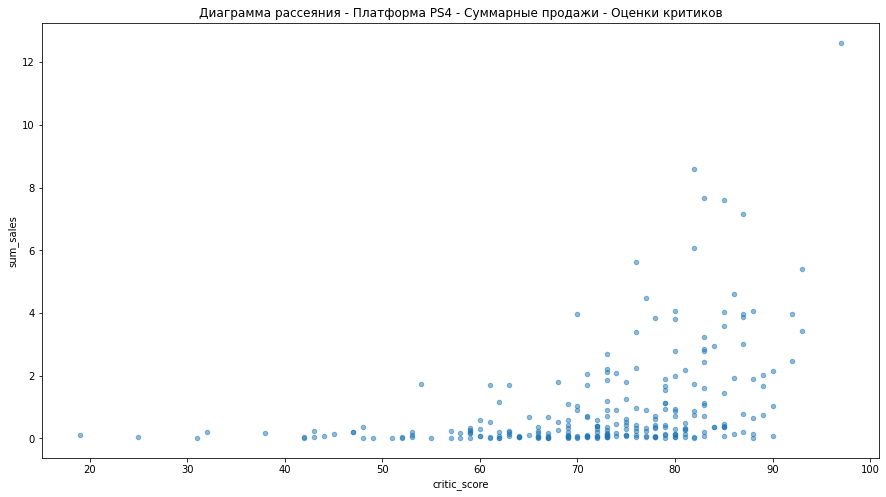

In [43]:
#за популярную платформу возьмем PS3, лидера по суммарным продажам за актуальный период

data_actual[data_actual['platform'] == 'PS4'].query('user_score >= 0').plot(kind='scatter',
        y='sum_sales' , x='user_score', alpha=0.5, subplots=True, figsize=(15,8))
plt.title('Диаграмма рассеяния - Платформа PS4 - Суммарные продажи - Оценки пользователей')

data_actual[data_actual['platform'] == 'PS4'].query('critic_score >= 0').plot(kind='scatter',
        y='sum_sales' , x='critic_score', alpha=0.5, subplots=True, figsize=(15,8))
plt.title('Диаграмма рассеяния - Платформа PS4 - Суммарные продажи - Оценки критиков');

In [44]:
data_PS4 = data_actual[data_actual['platform'] == 'PS4'].query('user_score >= 0')

data_PS4['sum_sales'].corr(data_PS4['user_score'])

-0.031957110204556376

In [45]:
data_PS4 = data_actual[data_actual['platform'] == 'PS4'].query('critic_score >= 0')

data_PS4['sum_sales'].corr(data_PS4['critic_score'])

0.406567902061781

Из результатов исследования можем сделать вывод: что чем выше оценка критиков и пользователей то продажи хоть небольшой , но имеют рост. Корреляция между отзывами пользователей и суммой продаж отрицательная. Корреляция между отзывами критиков и суммой продаж слабая. Люди покупают игры больше опираясь на отзывы критиков, нежели пользователей. 

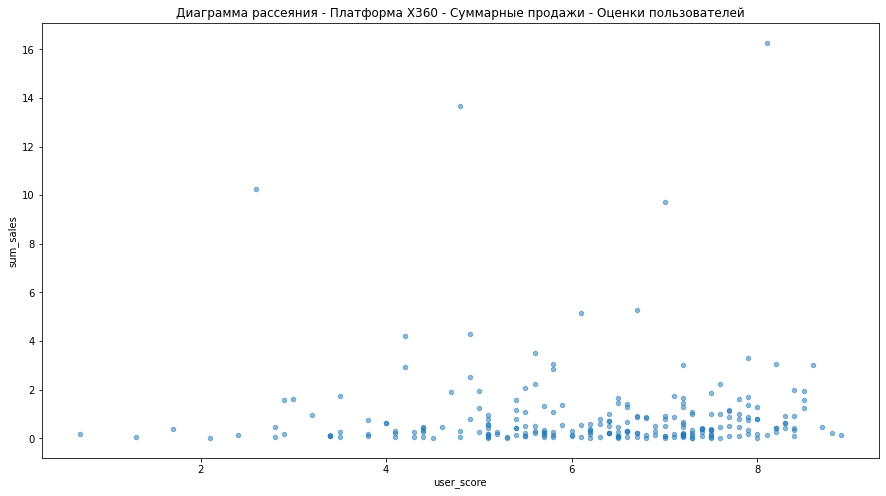

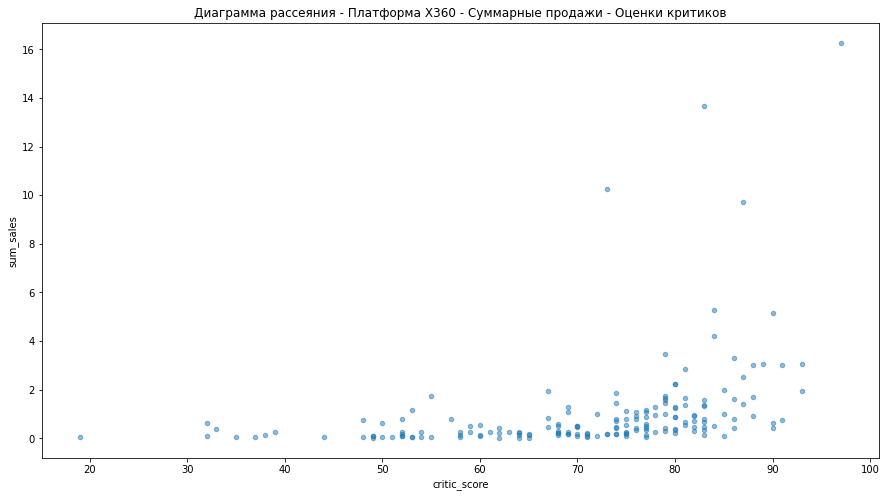

In [46]:
#посмотрим на взаимосвязь с оценками пользователей и критиков на других платформах

data_actual[data_actual['platform'] == 'X360'].query('user_score >= 0').plot(kind='scatter',
        y='sum_sales' , x='user_score', alpha=0.5, subplots=True, figsize=(15,8))
plt.title('Диаграмма рассеяния - Платформа X360 - Суммарные продажи - Оценки пользователей')

data_actual[data_actual['platform'] == 'X360'].query('critic_score >= 0').plot(kind='scatter',
        y='sum_sales' , x='critic_score', alpha=0.5, subplots=True, figsize=(15,8))
plt.title('Диаграмма рассеяния - Платформа X360 - Суммарные продажи - Оценки критиков');

In [47]:
data_X360 = data_actual[data_actual['platform'] == 'X360'].query('user_score >= 0')

data_X360['sum_sales'].corr(data_X360['user_score'])

0.0061639786462133256

In [48]:
data_X360 = data_actual[data_actual['platform'] == 'X360'].query('critic_score >= 0')

data_X360['sum_sales'].corr(data_X360['critic_score'])

0.36057348885073365

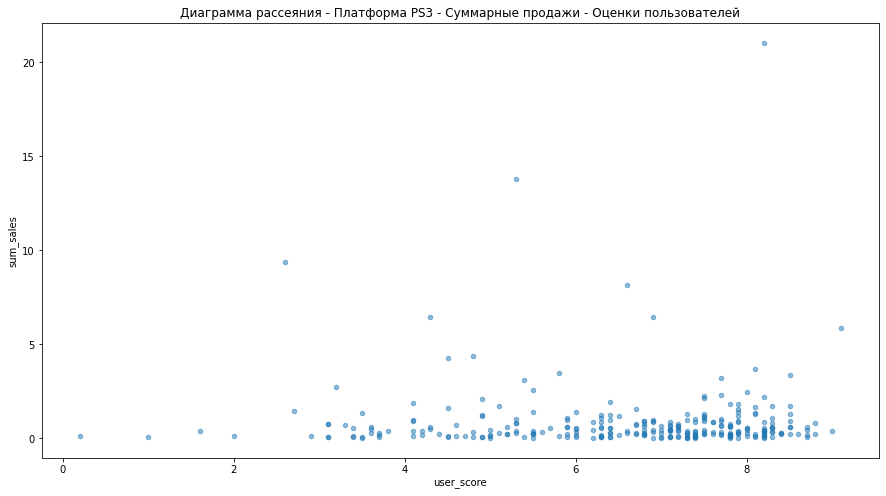

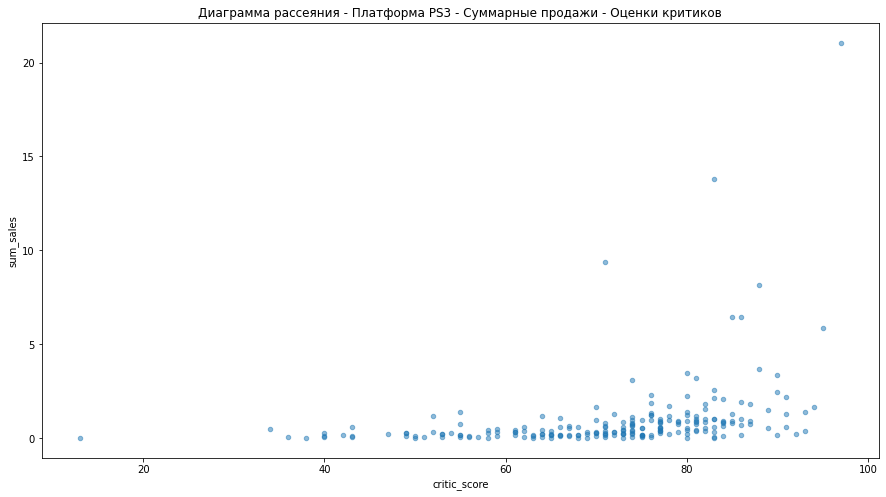

In [49]:
data_actual[data_actual['platform'] == 'PS3'].query('user_score >= 0').plot(kind='scatter',
        y='sum_sales' , x='user_score', alpha=0.5, subplots=True, figsize=(15,8))
plt.title('Диаграмма рассеяния - Платформа PS3 - Суммарные продажи - Оценки пользователей')

data_actual[data_actual['platform'] == 'PS3'].query('critic_score >= 0').plot(kind='scatter',
        y='sum_sales' , x='critic_score', alpha=0.5, subplots=True, figsize=(15,8))
plt.title('Диаграмма рассеяния - Платформа PS3 - Суммарные продажи - Оценки критиков');

In [50]:
data_PS3 = data_actual[data_actual['platform'] == 'PS3'].query('user_score >= 0')

data_PS3['sum_sales'].corr(data_PS3['user_score'])

-0.005143522887113828

In [51]:
data_PS3 = data_actual[data_actual['platform'] == 'PS3'].query('critic_score >= 0')

data_PS3['sum_sales'].corr(data_PS3['critic_score'])

0.3314972592629587

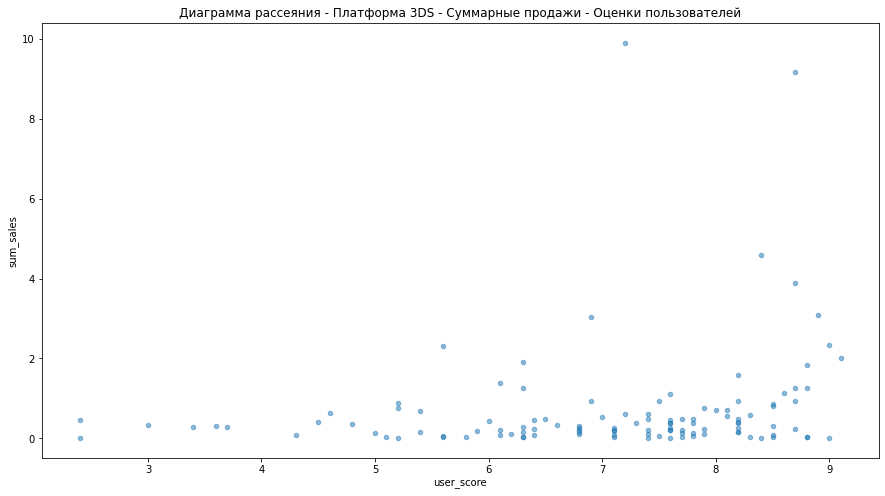

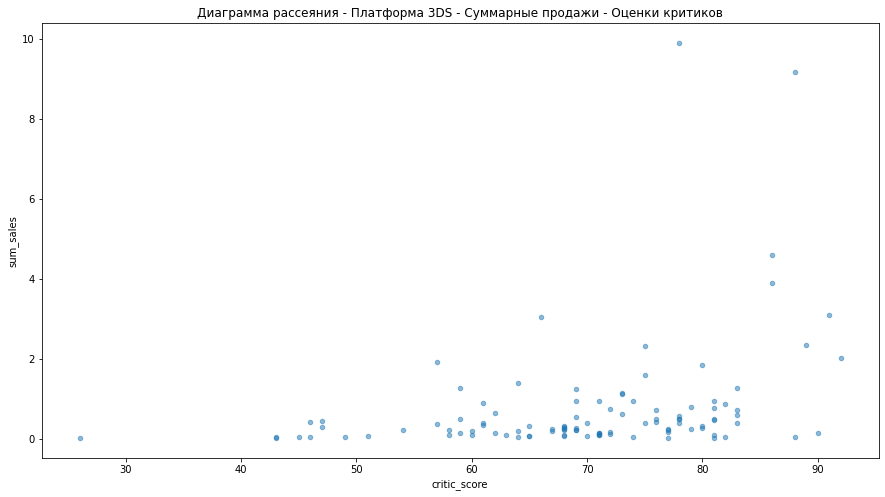

In [52]:
data_actual[data_actual['platform'] == '3DS'].query('user_score >= 0').plot(kind='scatter',
        y='sum_sales' , x='user_score', alpha=0.5, subplots=True, figsize=(15,8))
plt.title('Диаграмма рассеяния - Платформа 3DS - Суммарные продажи - Оценки пользователей')

data_actual[data_actual['platform'] == '3DS'].query('critic_score >= 0').plot(kind='scatter',
        y='sum_sales' , x='critic_score', alpha=0.5, subplots=True, figsize=(15,8))
plt.title('Диаграмма рассеяния - Платформа 3DS - Суммарные продажи - Оценки критиков');

In [53]:
data_3DS = data_actual[data_actual['platform'] == '3DS'].query('user_score >= 0')

data_3DS['sum_sales'].corr(data_3DS['user_score'])

0.19758263411038596

In [54]:
data_3DS = data_actual[data_actual['platform'] == '3DS'].query('critic_score >= 0')

data_3DS['sum_sales'].corr(data_3DS['critic_score'])

0.32080286953607845

В целом корреляция по платформам между суммой продаж и оценками пользователей схожа и очень слабая, либо отрицательная. можем выделить корреляцию между продажами и оценками критиков у платформ PS4 и X360 она заметно отличается от остальных и близится к 0,5 (что все равно слабый показатель влияния).

#### Посмотрим на общее распределение игр по жанрам. 

In [55]:
data_actual['genre'].value_counts()

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

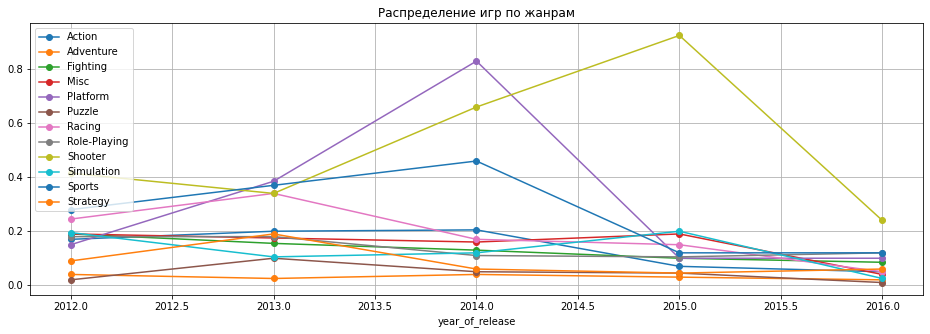

In [56]:
data_actual.pivot_table(index='year_of_release', columns='genre', values='sum_sales', aggfunc='median') \
    .plot(kind='line', style='o-', figsize=(16, 5), grid=True, \
         title='Распределение игр по жанрам'); 
plt.legend(loc='upper left');

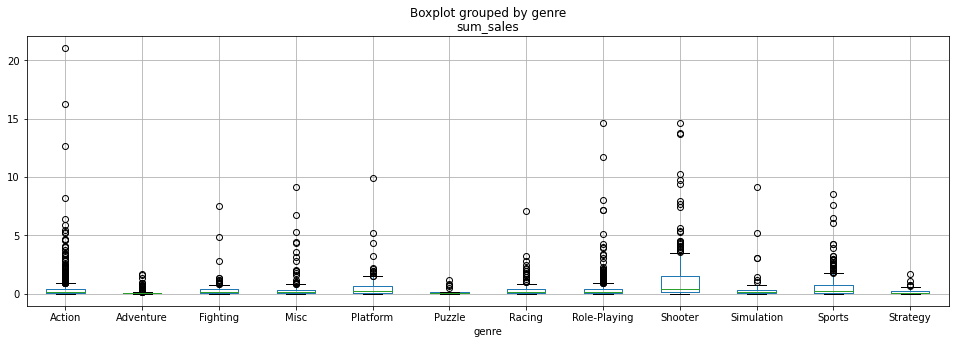

In [57]:
data_actual.boxplot(figsize=(16, 5), column='sum_sales', by='genre'); 

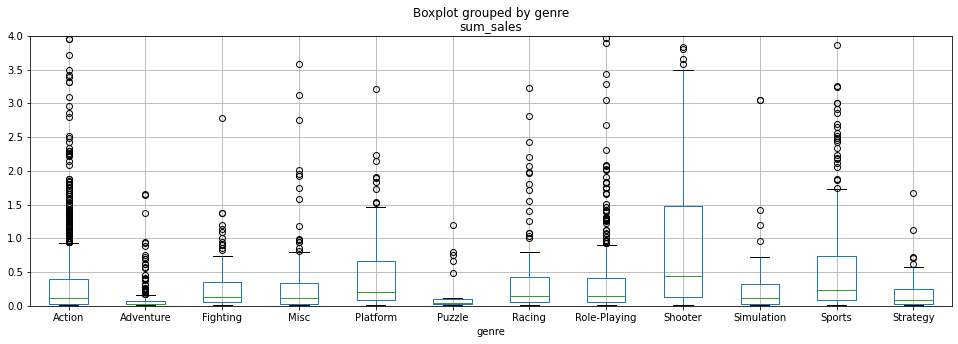

In [58]:
data_actual.boxplot(figsize=(16, 5), column='sum_sales', by='genre'); 
plt.ylim(0, 4);

По количеству проданных жанров за актуальный период лидирует жанр Action, затем идет Role-Playing

По сумме продаж за актуальный период лидером становится Shooter, второе место жанр Sports, Третье место занимает Platform  

Активные жанры пользуются успехом, затем как на низких продажах остаются жанры с большей усидчивостью: Puzzle, Strategy, Adventure

### Составим портрет пользователя для каждого региона

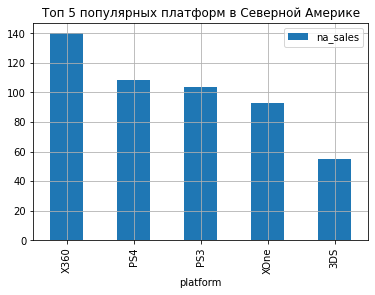

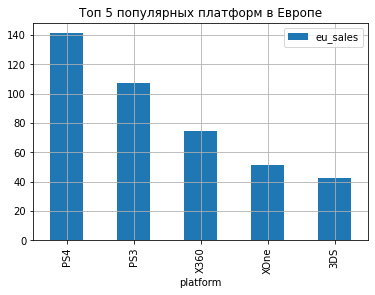

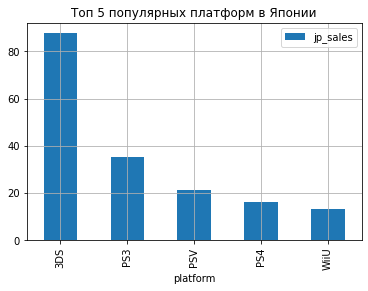

In [59]:
data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum') \
    .sort_values(by='na_sales', ascending=False).head(5) \
    .plot(kind='bar', grid=True, title='Топ 5 популярных платформ в Северной Америке');

data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum') \
    .sort_values(by='eu_sales', ascending=False).head(5) \
    .plot(kind='bar', grid=True, title='Топ 5 популярных платформ в Европе');

data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum') \
    .sort_values(by='jp_sales', ascending=False).head(5) \
    .plot(kind='bar', grid=True, title='Топ 5 популярных платформ в Японии');

В Северной Америке популярные платформы X360 и Wii далее замыкают топ 5 PS3, DS, PS2. В Европе первое место занимает PS3, потом идут X360, Wii, DS, PS4. В Японии с отрывом лидирует платформа DS, потом 3DS, PS3, PSP, и Wii.

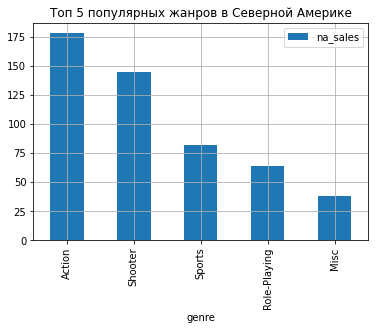

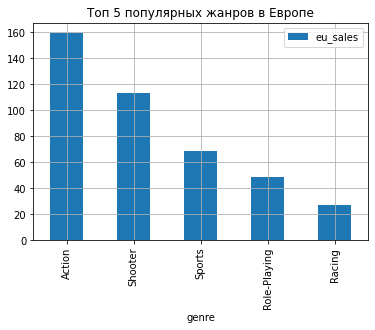

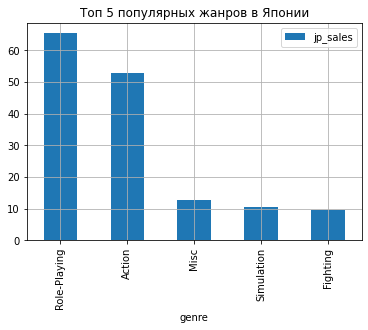

In [60]:
data_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum') \
    .sort_values(by='na_sales', ascending=False).head(5) \
    .plot(kind='bar', grid=True, title='Топ 5 популярных жанров в Северной Америке');

data_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum') \
    .sort_values(by='eu_sales', ascending=False).head(5) \
    .plot(kind='bar', grid=True, title='Топ 5 популярных жанров в Европе');

data_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum') \
    .sort_values(by='jp_sales', ascending=False).head(5) \
    .plot(kind='bar', grid=True, title='Топ 5 популярных жанров в Японии');

В Европе и Северной Америке схожая популярность жанров Action, Sports и Shooter. 

В Японии с большим отрывом преобладает жанр Role-Playing, далее идут Action, Misc, Spoirts.

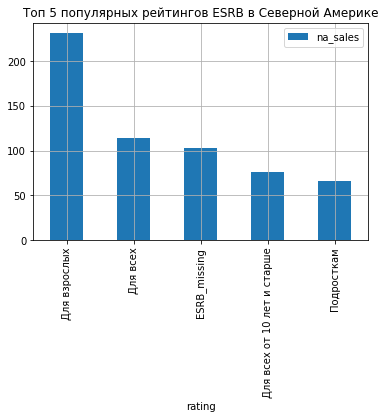

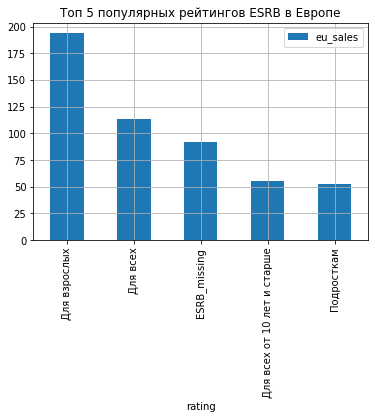

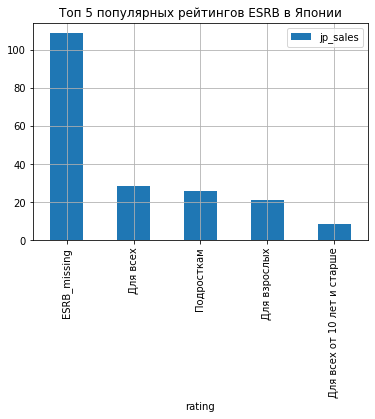

In [61]:
data_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum') \
    .sort_values(by='na_sales', ascending=False).head(5) \
    .plot(kind='bar', grid=True, title='Топ 5 популярных рейтингов ESRB в Северной Америке');

data_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum') \
    .sort_values(by='eu_sales', ascending=False).head(5) \
    .plot(kind='bar', grid=True, title='Топ 5 популярных рейтингов ESRB в Европе');

data_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum') \
    .sort_values(by='jp_sales', ascending=False).head(5) \
    .plot(kind='bar', grid=True, title='Топ 5 популярных рейтингов ESRB в Японии');

В Северной Америке и Европе на первом месте рейтинг компьютерных игр "Для взрослых". В Японии топ продаж заняли игры без указанного рейтинга. Вторую строчку в Европе, Северной Америке и Японии вторую занимают игры подходящие "Для всех" возрастов. В Европе и Северной Америке третья строка отведена по популярности играм без указанного рейтинга, В Японии эту позицию заняли игры для подростков. 

### Проверка гипотез

Для проверки гипотез будем использовать t-распределением Стьюдента - ведь он работает для выборки любого размера.

#### Первая гипотеза. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [62]:
from scipy import stats as st

H_0 (Нулевая гипотеза): Средний рейтинг (user_score) платформы XOne = среднему рейтингу (user_score) платформы PC

H_1 (Альтернативная гипотеза): Средний рейтинг (user_score) платформы XOne ≠ среднему рейтингу (user_score) платформы PC

alpha = 0.05

In [63]:
reit_xone = data_actual[(data_actual['platform'] == 'XOne') & (data_actual['user_score'] > 0)]['user_score']
reit_pc = data_actual[(data_actual['platform'] == 'PC') & (data_actual['user_score'] > 0)]['user_score']

print("Средний пользовательский рейтинг платформы XOne:", reit_xone.mean())
print("Средний пользовательский рейтинг платформы PC:", reit_pc.mean())

Средний пользовательский рейтинг платформы XOne: 6.521428571428572
Средний пользовательский рейтинг платформы PC: 6.4286407766990274


In [64]:
#results = вызовем метод для проверки гипотезы

results = st.ttest_ind(
    data_actual[(data_actual['platform'] == 'XOne') & (data_actual['user_score'] > 0)]['user_score'],
    data_actual[(data_actual['platform'] == 'PC') & (data_actual['user_score'] > 0)]['user_score'],
)

#alpha = зададим значение уровня значимости

alpha = .05

#выведем значения p-value на экран 

print(results.pvalue) 

#условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Вывод: средний пользовательский рейтинг платформы XOne отличается от среднего пользовательского рейтинга платформы PC

#### Вторая гипотеза. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H_0 (Нулевая гипотеза): Средний рейтинг (user_score) жанров Action = среднему рейтингу (user_score) жанра Sports

H_1 (Альтернативная гипотеза): Средний рейтинг (user_score) жанра Action ≠ среднему рейтингу (user_score) жанра Sports

alpha = 0.05

In [65]:
reit_action = data_actual[(data_actual['genre'] == 'Action') & (data_actual['user_score'] > 0)]['user_score']
reit_sports = data_actual[(data_actual['genre'] == 'Sports') & (data_actual['user_score'] > 0)]['user_score']

print("Средний пользовательский рейтинг в жанре Action:", reit_action.mean())
print("Средний пользовательский рейтинг в жанре Sports:", reit_sports.mean())

Средний пользовательский рейтинг в жанре Action: 6.825047801147227
Средний пользовательский рейтинг в жанре Sports: 5.455897435897437


In [66]:
#results = вызовем метод для проверки гипотезы

results = st.ttest_ind(
    data_actual[(data_actual['genre'] == 'Action') & (data_actual['user_score'] > 0)]['user_score'],
    data_actual[(data_actual['genre'] == 'Sports') & (data_actual['user_score'] > 0)]['user_score'],
)

#alpha = зададим значение уровня значимости

alpha = .05

#выведем значения p-value на экран 

print(results.pvalue) 

#условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

3.7163089460934874e-26
Отвергаем нулевую гипотезу


Вывод: средний пользовательский рейтинг жанров Action отличается от среднего пользовательского рейтинга жанра Sports

### Общий вывод.

* Было проведено исследование чтобы выявить определяющие успешность игры закономерности. Входные данные - данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы. 
* В ходе исследования были изучены входящие данные, обработаны пропущенные значения, там где это возможно. Были изменены типы данных на необходимые типы для дальнейшей работы. Была изучена информация о рейтинге ESRB и в соответсвии с рейтингом изменены входящие данные для удобства дальнейшей работы. Были посчитаны и добавлены в таблицу суммарные продажи по всем регионам представленых в таблице. 
* Далее мы изучили сколько игр выпускалось в разные годы. В результате исследования выявили, что лидеры по выпуску игр на отрезке с 1993 по 2016 год, стали 2008, 2009 годы с количеством 1426, 1427 игр. Больше тысячи игр выпускали в период с 2006 по 2011 годы. 
* Изучили как менялись продажи по платформам. Пришли к выводу, что топ продаж игр по платформам занимает PS2, следом идут X360, Wii, PS3, DS, PS. Выявили характерный срок "жизни" платформы , он составил 10 лет. 
* Определили актуальный период для исследования с 2012 по 2016 год. 
* Строили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Выяснили, что медианное значение платформ розниться от 0,05 до 0,25 млн прибыли. Верхние границы до начала аномалий у платформ PS4 и X360 доходят до 1,7 млн, у остальных платформ от 0,25 до 1,5 млн. Платформа PS2 имеет самый маленький бокс, без аномалий, соответственно ее сумма продаж минимальны на общем фоне. Самое высокое значение выброса у платформы PS3.
* Строили диаграмму рассеяния, чтобы изучить как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Из результатов исследования сделали вывод: что чем выше оценка критиков и пользователей то продажи хоть небольшой , но имеют рост. Корреляция между отзывами пользователей и суммой продаж очень слабая. Корреляция между отзывами критиков и суммой продаж слабая, но в сравнении с пользователями достаточно выше. Люди покупают игры больше опираясь на отзывы критиков, нежели пользователей. 
* Были изучены распределения выручки по игровым жанрам. Вывод, что по количеству проданных жанров за актуальный период лидирует жанр Action, затем идет Role-Playing. По сумме продаж за актуальный период лидером становится Shooter, второе место жанр Sports, Третье место занимает Platform. Активные жанры пользуются успехом, затем как на низких продажах остаются жанры с большей усидчивостью: Puzzle, Strategy, Adventure.
* Был составлен портрет для кадого региона. В Северной Америке популярна платформа X360, жанры Action, Sports и Shooter и в топе продажи игр с рейтингом "Для взрослых". В Европе в лидерах платформа PS3, также любят жанры Action, Sports и Shooter и в топе продажи игр с рейтингаом такими же как в Северной Америке "Для взрослых". В Японии же с большим отрывом в топе популярности платформа DS, с таким же отрывом в топе жанр ролевых игр и игры с неуказанным рейтингом ESRB.
* Было проверено две гипотезы. Первая гипотеза что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не подтвердилась. А вторая, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные подтвердилась. 


* Итог. Для планирования кампании на 2017 год необходимо обратить внимание на платформы PS3 и X360 с преобладающими жанрами Action и Shooter. Имеющие рейтинг ESRB "Для взрослых". Стоит проводить рекламные кампании в Европе и Северной Америке, Японию лучше избежать. Также обратить внимание на отзывы критиков, отзывы пользователей не стоит учитывать в планировании кампаний. В целом игровая индустрия испытывает проблемы, продажи падают, популярные платформы исчезают, нужно искать новые возможности для захвата интереса и внимания геймеров. 